In [38]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import time
%matplotlib inline

# Extend PATH Variable
import sys
sys.path.append("src/")

# NanoNets Simulation Tool
import nanonets
import nanonets_utils

import warnings
warnings.filterwarnings("error")

# Plot Colors
blue_color  = '#348ABD'
red_color   = '#A60628'

In [ ]:
def autocorrelation(x : np.array, y : np.array, lags : int)->np.array:
    """Compute autocorrelation between two arrays "x" and "y" for a range of lags

    Parameters
    ----------
    x : np.array
        First time series array
    y : np.array
        Second time series array
    lags : int
        Number of lags

    Returns
    -------
    np.array
        Autocorrelation for each lag from 0 to lags-1
    """

    return [np.corrcoef(x, y)[0,1] if l==0 else np.corrcoef(x[:-l], y[l:])[0,1] for l in range(lags)]

def run_kmc(voltages, topology_parameter, sim_dic):

    np_network_cubic = nanonets.simulation(network_topology='cubic', topology_parameter=topology_parameter)
    np_network_cubic.run_const_voltages(voltages=voltages, target_electrode=7, save_th=0.1, output_potential=False, sim_dic=sim_dic, verbose=True)

    df              = pd.DataFrame(np.hstack((voltages,np_network_cubic.return_output_values())))
    I_target_values = np_network_cubic.I_target_values
    t_vals          = np_network_cubic.time_values
    executed_jumps  = np_network_cubic.jumps_per_it
    potential_dist  = np_network_cubic.pot_per_it

    print(np_network_cubic.adv_index_rows)
    print(np_network_cubic.adv_index_cols)
    
    return df, pd.DataFrame(I_target_values).T, pd.DataFrame(t_vals).T, executed_jumps, potential_dist

# 7x7 Network

In [40]:
voltages = np.random.uniform(-0.1,0.1, size=(300,9))

sim_dic = {
    'error_th'        : 0.05,
    'max_jumps'       : 10000,
    'eq_steps'        : 50000,
    'jumps_per_batch' : 1,
    'kmc_counting'    : False
}

topology_parameter = {
    "Nx"    : 7,
    "Ny"    : 7,
    "Nz"    : 1,
    "e_pos" : [[0,0,0],[3,0,0],[6,0,0],[0,3,0],[0,6,0],[3,6,0],[6,3,0],[6,6,0]]
}

In [41]:
results, target_currents, time_vals, jumps, potentials = run_kmc(voltages, topology_parameter, sim_dic)

[ 0  1  2  3  4  5  6  7  8  8  8  9  9  9 10 10 10 11 11 11 11 12 12 12
 13 13 13 14 14 14 15 15 15 16 16 16 16 17 17 17 17 18 18 18 18 19 19 19
 19 20 20 20 20 21 21 21 22 22 22 23 23 23 23 24 24 24 24 25 25 25 25 26
 26 26 26 27 27 27 27 28 28 28 29 29 29 29 30 30 30 30 31 31 31 31 32 32
 32 32 33 33 33 33 34 34 34 34 35 35 35 35 36 36 36 37 37 37 37 38 38 38
 38 39 39 39 39 40 40 40 40 41 41 41 41 42 42 42 43 43 43 44 44 44 44 45
 45 45 45 46 46 46 46 47 47 47 47 48 48 48 48 49 49 49 50 50 50 51 51 51
 52 52 52 53 53 53 53 54 54 54 55 55 55 56 56 56]
[ 8 11 14 29 50 53 35 56  0  9 15  8 10 16  9 11 17  1 10 12 18 11 13 19
 12 14 20  2 13 21  8 16 22  9 15 17 23 10 16 18 24 11 17 19 25 12 18 20
 26 13 19 21 27 14 20 28 15 23 29 16 22 24 30 17 23 25 31 18 24 26 32 19
 25 27 33 20 26 28 34 21 27 35  3 22 30 36 23 29 31 37 24 30 32 38 25 31
 33 39 26 32 34 40 27 33 35 41  6 28 34 42 29 37 43 30 36 38 44 31 37 39
 45 32 38 40 46 33 39 41 47 34 40 42 48 35 41 49 36 44 50 37 43 45 51 38
 

## Potentials

In [42]:
def extract_potential_landscape(potentials, time_vals, volt_combo=0, N_electrodes=8, N_particles=49):

    df          = pd.DataFrame(potentials[volt_combo]).iloc[:,N_electrodes:]*1000
    df.columns  = np.arange(N_particles)

    t           = np.cumsum(time_vals.iloc[:,volt_combo].values)*1e9

    return t, df

In [43]:
landscape_time, landscape_vs_time = extract_potential_landscape(potentials, time_vals)
landscape_vs_time

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,-15.605591,-29.136513,-18.579685,-56.849073,-33.674866,-4.565993,25.969751,-27.556712,-13.816700,-13.396730,...,-16.538509,-34.981038,-39.531323,-69.416482,-47.288686,-54.621209,-3.501552,-31.475208,-42.344895,-62.777280
1,-15.605579,-29.136509,-18.579684,-56.849073,-33.674865,-4.565989,25.969763,-27.556644,-13.816688,-13.396728,...,-13.195812,-34.422357,-39.440797,-69.433955,-47.486671,-56.380020,-17.462953,-33.234020,-42.542879,-62.794753
2,-15.607795,-29.137273,-18.579883,-56.849113,-33.674874,-4.565991,25.969762,-27.569509,-13.818972,-13.397144,...,-13.210922,-34.424963,-39.441261,-52.953049,-45.241624,-56.093289,-17.434832,-33.231920,-42.542976,-62.794844
3,-15.591686,-29.050293,-18.113549,-54.291819,-16.713354,-21.603088,23.050038,-27.557416,-13.766492,-13.173468,...,-13.209224,-34.426477,-39.442905,-52.952987,-45.241465,-56.092984,-17.434446,-33.231621,-42.543224,-62.795152
4,-15.604487,-29.054706,-18.114695,-54.292048,-16.713407,-21.603100,23.050035,-27.631732,-13.779684,-13.175871,...,-13.205722,-34.426322,-39.442922,-50.045589,-44.356189,-55.894020,-17.400695,-33.225390,-42.542158,-62.794981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-30.310200,-18.050718,-36.416671,-55.909422,-9.220770,23.480226,50.873293,-12.771024,-29.402297,-18.814810,...,-13.849019,-30.601147,-34.209810,-49.032444,-41.257653,-35.874766,-13.663035,-28.803045,-18.439099,-39.113518
9996,-30.226568,-17.587550,-33.862603,-41.447044,-26.717939,20.387101,50.327755,-12.719857,-29.191516,-18.032837,...,-13.851303,-30.603645,-34.211147,-49.032324,-41.257399,-35.874433,-13.662921,-28.803484,-18.439626,-39.113821
9997,-30.225821,-17.583675,-33.842730,-41.343876,-26.070389,23.952810,70.398721,-12.719140,-29.188302,-18.017665,...,-13.849196,-30.599935,-34.207121,-49.032312,-41.257363,-35.874336,-13.662707,-28.802974,-18.438812,-39.113034
9998,-30.169479,-17.344532,-32.970750,-39.209659,-28.652639,23.001123,70.150675,-12.611780,-28.645892,-15.028346,...,-13.859234,-30.610595,-34.212393,-49.031720,-41.255968,-35.872128,-13.661258,-28.804731,-18.441029,-39.114252


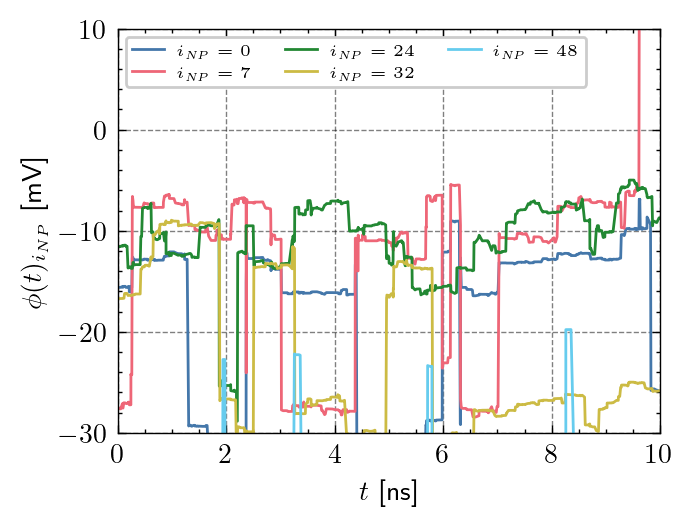

In [44]:
with plt.style.context(['science','bright','grid']):
    
    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for i in [0,7,24,32,48]:
        ax.plot(landscape_time, landscape_vs_time.iloc[:,i], label='$i_{NP} = '+f'{i}$')
    
    ax.set_xlabel('$t$ [ns]')
    ax.set_ylabel('$\\phi(t)_{i_{NP}}$ [mV]')
    ax.legend(fontsize='xx-small', ncol=3)
    ax.set_ylim(-30,10)
    ax.set_xlim(0,10)
    fig.savefig("docs/autocorrelation/pot_vs_time.png")

In [52]:
def average_auto_corr(time_vals, landscape, n_vals=1000, n_lags=200):

    t       = time_vals[:n_lags]
    a_corrs = []

    for col in landscape.columns:

        try:
            p       = landscape.iloc[:n_vals,col].values
            a_p     = autocorrelation(p,p,n_lags)
            a_corrs.append(a_p)
        except RuntimeWarning:
            pass

    return t, np.nanmean(a_corrs,axis=0), np.nanstd(a_corrs,axis=0)

In [49]:
t   = np.linspace(0,2,1000)
ys  = []

for volt_combo in range(300):
    landscape_time, landscape_vs_time   = extract_potential_landscape(potentials, time_vals, volt_combo)
    x, y, y_r                           = average_auto_corr(landscape_time, landscape_vs_time)
    func                                = interp1d(np.insert(x,0,0)[:-1], y, bounds_error=False, fill_value=0)
    ys.append(func(t))

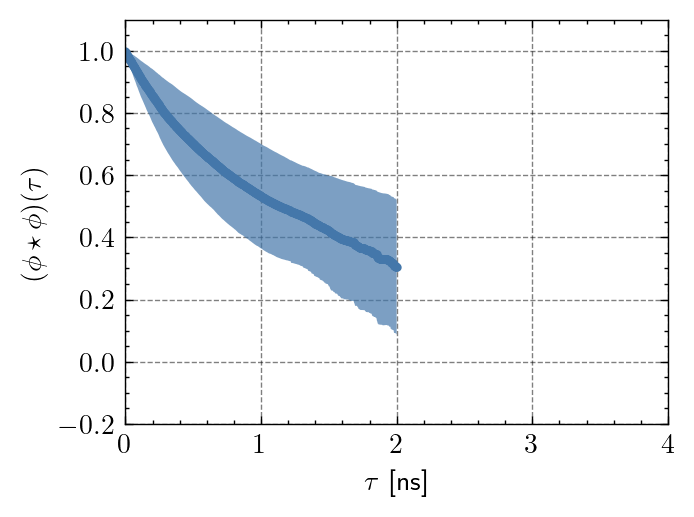

In [51]:
y   = np.mean(ys,axis=0)
y_e = np.std(ys,axis=0)

with plt.style.context(['science','bright','grid']):
    
    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax.plot(t, y, 'o-', ms=2)
    ax.fill_between(t, y-y_e, y+y_e, alpha=0.7)
    ax.set_xlabel("$\\tau$ [ns]")
    ax.set_ylabel("$(\\phi \\star \\phi)(\\tau)$")
    ax.set_ylim(-0.2,1.1)
    ax.set_xlim(0,4)
    fig.savefig("docs/autocorrelation/auto_potentials.png")

## Jumps

In [53]:
def extract_jumps(jumps, time_vals, volt_combo=0):

    df          = pd.DataFrame(jumps[volt_combo]).iloc[:,:]
    t           = np.cumsum(time_vals.iloc[:,volt_combo].values)*1e9

    return t, df

In [54]:
jumps_time, jumps_vs_time = extract_jumps(jumps, time_vals)
jumps_vs_time

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


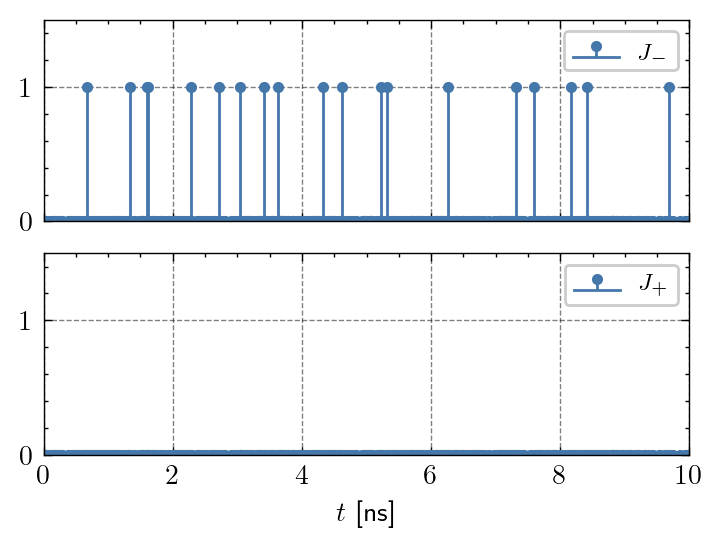

In [15]:
with plt.style.context(['science','bright','grid']):
    
    fig = plt.figure(dpi=200, layout='constrained')
    ax  = fig.add_subplot(2,1,1)
    ax.stem(jumps_time, jumps_vs_time.iloc[:,7], markerfmt='.', basefmt='', label='$J_-$')
    ax.set_yticks([0,1])
    ax.set_xlim(0,10)
    ax.set_ylim(0,1.5)
    ax.set_xticklabels('')
    ax.legend(fontsize='small')

    ax  = fig.add_subplot(2,1,2)
    ax.stem(jumps_time, jumps_vs_time.iloc[:,181], markerfmt='.', basefmt='', label='$J_+$')
    ax.set_yticks([0,1])
    ax.set_xlabel('$t$ [ns]')
    ax.set_xlim(0,10)
    ax.set_ylim(0,1.5)
    ax.legend(fontsize='small')
    fig.savefig("docs/autocorrelation/jumps_vs_time.png")

In [16]:
t_diff_jumps        = []
t_diff_jumps_out    = []

for volt_combo in range(300):

    jumps_time, jumps_vs_time = extract_jumps(jumps, time_vals, volt_combo)
    t_diff_jumps_out.extend(list(np.diff(jumps_time[jumps_vs_time.iloc[:,7].astype(bool).values])))
    t_diff_jumps_out.extend(list(np.diff(jumps_time[jumps_vs_time.iloc[:,181].astype(bool).values])))
    
    for col in jumps_vs_time.columns:
        
        # jumps_time, jumps_vs_time = extract_jumps(jumps, time_vals, volt_combo)
        t_diff_jumps.extend(list(np.diff(jumps_time[jumps_vs_time.iloc[:,col].astype(bool).values])))

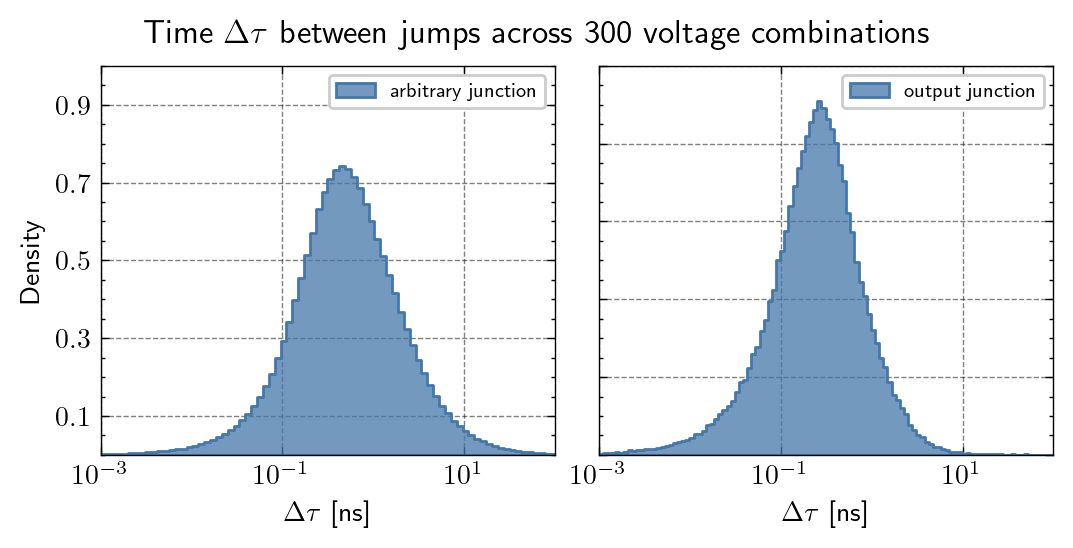

In [17]:
with plt.style.context(['science','bright','grid']):
    
    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*1.5)
    fig.suptitle('Time $\\Delta \\tau$ between jumps across 300 voltage combinations')
    ax  = fig.add_subplot(1,2,1)
    ax  = sns.histplot(t_diff_jumps, ax=ax, bins=150, log_scale=True, stat='density', label='arbitrary junction', element='step', fill=True)
    ax.set_xlabel("$\\Delta \\tau$ [ns]")
    ax.set_xlim(1e-3,1e2)
    ax.set_ylim(0,1)
    ax.legend(fontsize='x-small', loc='upper right')
    ax.set_yticks([0.1,0.3,0.5,0.7,0.9])

    ax  = fig.add_subplot(1,2,2)
    ax  = sns.histplot(t_diff_jumps_out, ax=ax, bins=150, log_scale=True, stat='density', label='output junction', element='step', fill=True)
    ax.set_xlabel("$\\Delta \\tau$ [ns]")
    ax.set_xlim(1e-3,1e2)
    ax.set_ylim(0,1)
    ax.set_yticklabels('')
    ax.set_ylabel('')
    ax.legend(fontsize='x-small', loc='upper right')
    fig.savefig("docs/autocorrelation/time_between_jumps.png")

## 3x3 Network

In [18]:
voltages = np.random.uniform(-0.1,0.1, size=(300,9))

sim_dic = {
    'error_th'        : 0.05,
    'max_jumps'       : 10000,
    'eq_steps'        : 50000,
    'jumps_per_batch' : 1,
    'kmc_counting'    : False
}

topology_parameter = {
    "Nx"    : 3,
    "Ny"    : 3,
    "Nz"    : 1,
    "e_pos" : [[0,0,0],[1,0,0],[2,0,0],[0,1,0],[0,2,0],[1,2,0],[2,1,0],[2,2,0]]
}

In [19]:
results, target_currents, time_vals, jumps, potentials = run_kmc(voltages, topology_parameter, sim_dic)

[ 0  1  2  3  4  5  6  7  8  8  8  9  9  9  9 10 10 10 11 11 11 11 12 12
 12 12 13 13 13 13 14 14 14 15 15 15 15 16 16 16]
[ 8  9 10 11 14 15 13 16  0  9 11  1  8 10 12  2  9 13  3  8 12 14  9 11
 13 15  6 10 12 16  4 11 15  5 12 14 16  7 13 15]


## Potentials

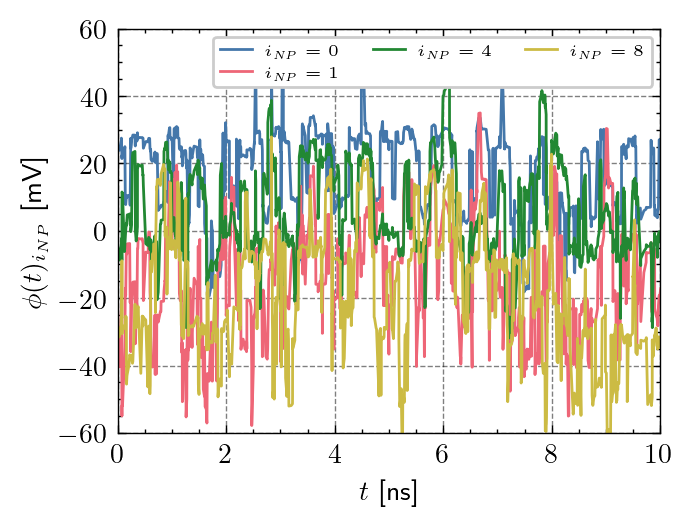

In [21]:
landscape_time, landscape_vs_time = extract_potential_landscape(potentials, time_vals, N_particles=9)

with plt.style.context(['science','bright','grid']):
    
    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for i in [0,1,4,8]:
        ax.plot(landscape_time, landscape_vs_time.iloc[:,i], label='$i_{NP} = '+f'{i}$')
    
    ax.set_xlabel('$t$ [ns]')
    ax.set_ylabel('$\\phi(t)_{i_{NP}}$ [mV]')
    ax.legend(fontsize='xx-small', ncol=3)
    ax.set_ylim(-60,60)
    ax.set_xlim(0,10)
    fig.savefig("docs/autocorrelation/pot_vs_time_3_3.png")

In [22]:
t   = np.linspace(0,2,1000)
ys  = []

for volt_combo in range(300):
    landscape_time, landscape_vs_time   = extract_potential_landscape(potentials, time_vals, volt_combo, N_particles=9)
    x, y, y_r                           = average_auto_corr(landscape_time, landscape_vs_time)
    func                                = interp1d(np.insert(x,0,0)[:-1], y, bounds_error=False, fill_value=0)
    ys.append(func(t))

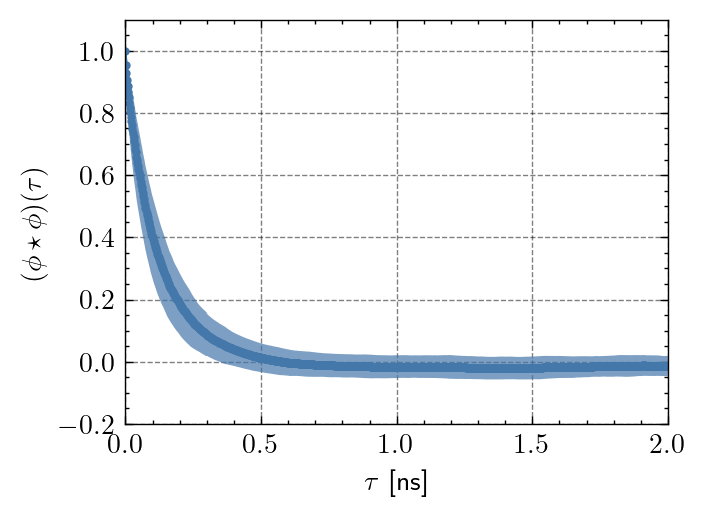

In [23]:
y   = np.mean(ys,axis=0)
y_e = np.std(ys,axis=0)

with plt.style.context(['science','bright','grid']):
    
    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax.plot(t, y, 'o-', ms=2)
    ax.fill_between(t, y-y_e, y+y_e, alpha=0.7)
    ax.set_xlabel("$\\tau$ [ns]")
    ax.set_ylabel("$(\\phi \\star \\phi)(\\tau)$")
    ax.set_ylim(-0.2,1.1)
    ax.set_xlim(0,2)
    fig.savefig("docs/autocorrelation/auto_potentials_3_3.png")

## Jumps

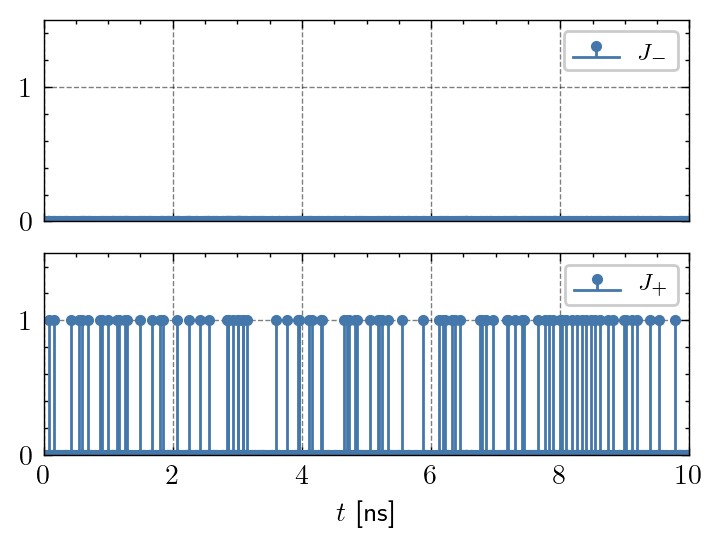

In [24]:
jumps_time, jumps_vs_time = extract_jumps(jumps, time_vals)

with plt.style.context(['science','bright','grid']):
    
    fig = plt.figure(dpi=200, layout='constrained')
    ax  = fig.add_subplot(2,1,1)
    ax.stem(jumps_time, jumps_vs_time.iloc[:,7], markerfmt='.', basefmt='', label='$J_-$')
    ax.set_yticks([0,1])
    ax.set_xlim(0,10)
    ax.set_ylim(0,1.5)
    ax.set_xticklabels('')
    ax.legend(fontsize='small')

    ax  = fig.add_subplot(2,1,2)
    ax.stem(jumps_time, jumps_vs_time.iloc[:,37], markerfmt='.', basefmt='', label='$J_+$')
    ax.set_yticks([0,1])
    ax.set_xlabel('$t$ [ns]')
    ax.set_xlim(0,10)
    ax.set_ylim(0,1.5)
    ax.legend(fontsize='small')
    fig.savefig("docs/autocorrelation/jumps_vs_time_3_3.png")

In [59]:
t_diff_jumps        = []
t_diff_jumps_out    = []
junctions_no_jump   = []

for volt_combo in range(300):

    jumps_time, jumps_vs_time = extract_jumps(jumps, time_vals, volt_combo)
    t_diff_jumps_out.extend(list(np.diff(jumps_time[jumps_vs_time.iloc[:,7].astype(bool).values])))
    t_diff_jumps_out.extend(list(np.diff(jumps_time[jumps_vs_time.iloc[:,37].astype(bool).values])))
    
    no_jump = 0
    for col in jumps_vs_time.columns:
        
        # jumps_time, jumps_vs_time = extract_jumps(jumps, time_vals, volt_combo)
        t_diff_jumps.extend(list(np.diff(jumps_time[jumps_vs_time.iloc[:,col].astype(bool).values])))

        if sum(jumps_time[jumps_vs_time.iloc[:,col].astype(bool).values]) == 0:
            no_jump += 1
    junctions_no_jump.append(no_jump/len(jumps_vs_time.columns))

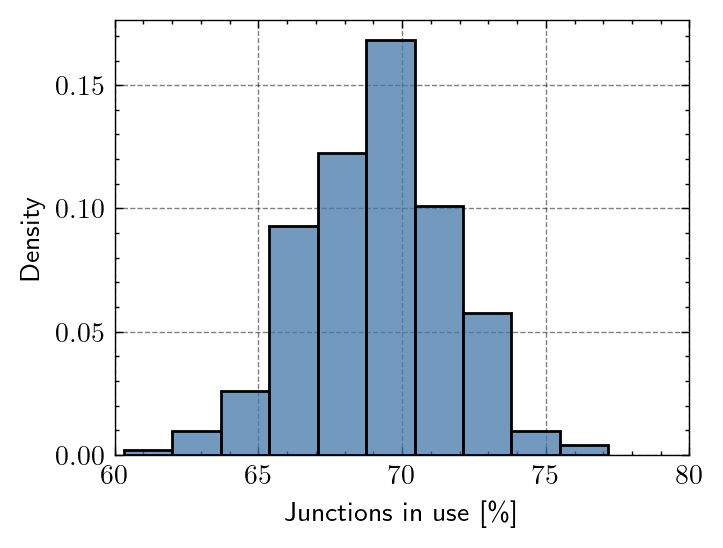

In [79]:
with plt.style.context(['science','bright','grid']):
    
    fig = plt.figure(dpi=200, layout='constrained')
    ax  = fig.add_subplot()
    ax  = sns.histplot((1-np.array(junctions_no_jump))*100, bins=10, stat='density', ax=ax)
    ax.set_xlabel('Junctions in use [\\%]')
    ax.set_xlim(60,80)

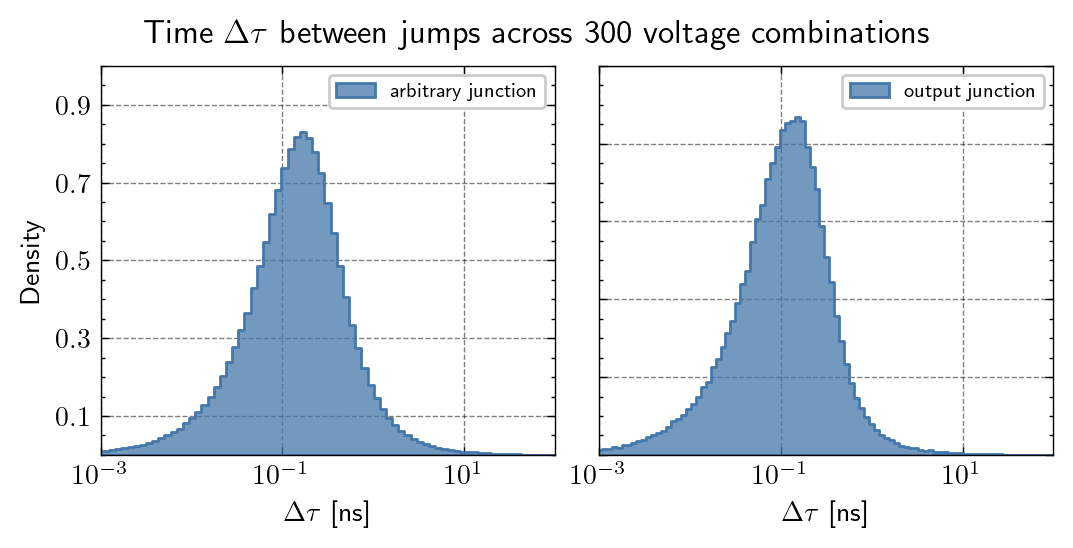

In [26]:
with plt.style.context(['science','bright','grid']):
    
    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*1.5)
    fig.suptitle('Time $\\Delta \\tau$ between jumps across 300 voltage combinations')
    ax  = fig.add_subplot(1,2,1)
    ax  = sns.histplot(t_diff_jumps, ax=ax, bins=150, log_scale=True, stat='density', label='arbitrary junction', element='step', fill=True)
    ax.set_xlabel("$\\Delta \\tau$ [ns]")
    ax.set_xlim(1e-3,1e2)
    ax.set_ylim(0,1)
    ax.legend(fontsize='x-small', loc='upper right')
    ax.set_yticks([0.1,0.3,0.5,0.7,0.9])

    ax  = fig.add_subplot(1,2,2)
    ax  = sns.histplot(t_diff_jumps_out, ax=ax, bins=150, log_scale=True, stat='density', label='output junction', element='step', fill=True)
    ax.set_xlabel("$\\Delta \\tau$ [ns]")
    ax.set_xlim(1e-3,1e2)
    ax.set_ylim(0,1)
    ax.set_yticklabels('')
    ax.set_ylabel('')
    ax.legend(fontsize='x-small', loc='upper right')
    fig.savefig("docs/autocorrelation/time_between_jumps_3_3.png")

# Memristive Resistance

In [27]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import time
%matplotlib inline

# Extend PATH Variable
import sys
sys.path.append("src/")

# NanoNets Simulation Tool
import nanonets
import nanonets_utils

import warnings
warnings.filterwarnings("error")

# Plot Colors
blue_color  = '#348ABD'
red_color   = '#A60628'

In [28]:
voltages = np.random.uniform(-0.1,0.1, size=(300,9))

topology_parameter = {
    "Nx"    : 7,
    "Ny"    : 7,
    "Nz"    : 1,
    "e_pos" : [[0,0,0],[3,0,0],[6,0,0],[0,3,0],[0,6,0],[3,6,0],[6,3,0],[6,6,0]]
}
sim_dic = {
    'error_th'        : 0.05,
    'max_jumps'       : 10000,
    'eq_steps'        : 50000,
    'jumps_per_batch' : 1,
    'kmc_counting'    : False
}

In [29]:
def run_memristor_kmc(voltages, topology_parameter, sim_dic, res_info):

    np_network_cubic = nanonets.simulation(network_topology='cubic', topology_parameter=topology_parameter, res_info=res_info)
    np_network_cubic.run_const_voltages(voltages=voltages, target_electrode=7, save_th=0.1, output_potential=False, sim_dic=sim_dic, verbose=True)

    df              = pd.DataFrame(np.hstack((voltages,np_network_cubic.return_output_values())))
    I_target_values = np_network_cubic.I_target_values
    t_vals          = np_network_cubic.time_values
    executed_jumps  = np_network_cubic.jumps_per_it
    potential_dist  = np_network_cubic.pot_per_it
    resistances     = np_network_cubic.res_per_it

    return df, pd.DataFrame(I_target_values).T, pd.DataFrame(t_vals).T, executed_jumps, potential_dist, resistances

In [30]:
tau_0 = 1e-8

res_info = {
    "mean_R"    : 25.0,
    "std_R"     : 0.0,
    "dynamic"   : True,
    'slope'     : 0.8,
    'shift'     : 7.5,
    'tau_0'     : tau_0,
    'R_max'     : 25,
    'R_min'     : 10
}

In [31]:
results_mem, target_currents_mem, time_vals_mem, jumps_mem, potentials_mem, resistances_mem = run_memristor_kmc(voltages, topology_parameter, sim_dic, res_info)

In [33]:
t   = np.linspace(0,2,1000)
ys  = []

for volt_combo in range(300):
    landscape_time, landscape_vs_time   = extract_potential_landscape(potentials_mem, time_vals_mem, volt_combo, N_particles=49)
    x, y, y_r                           = average_auto_corr(landscape_time, landscape_vs_time)
    func                                = interp1d(np.insert(x,0,0)[:-1], y, bounds_error=False, fill_value=0)
    ys.append(func(t))

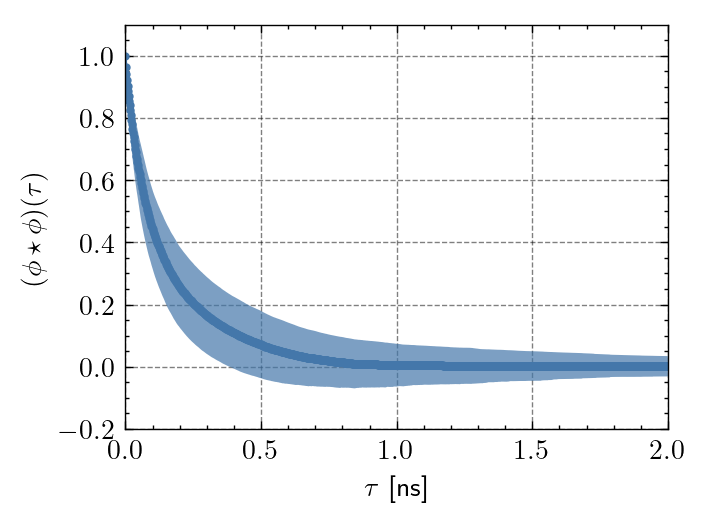

In [35]:
y   = np.mean(ys,axis=0)
y_e = np.std(ys,axis=0)

with plt.style.context(['science','bright','grid']):
    
    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax.plot(t, y, 'o-', ms=2)
    ax.fill_between(t, y-y_e, y+y_e, alpha=0.7)
    ax.set_xlabel("$\\tau$ [ns]")
    ax.set_ylabel("$(\\phi \\star \\phi)(\\tau)$")
    ax.set_ylim(-0.2,1.1)
    ax.set_xlim(0,2)

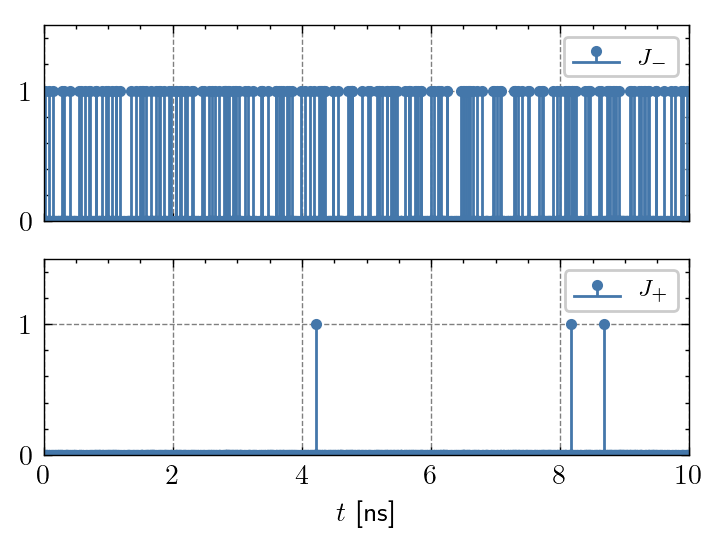

In [22]:
jumps_time, jumps_vs_time = extract_jumps(jumps_mem, time_vals_mem)

with plt.style.context(['science','bright','grid']):
    
    fig = plt.figure(dpi=200, layout='constrained')
    ax  = fig.add_subplot(2,1,1)
    ax.stem(jumps_time, jumps_vs_time.iloc[:,7], markerfmt='.', basefmt='', label='$J_-$')
    ax.set_yticks([0,1])
    ax.set_xlim(0,10)
    ax.set_ylim(0,1.5)
    ax.set_xticklabels('')
    ax.legend(fontsize='small')

    ax  = fig.add_subplot(2,1,2)
    ax.stem(jumps_time, jumps_vs_time.iloc[:,37], markerfmt='.', basefmt='', label='$J_+$')
    ax.set_yticks([0,1])
    ax.set_xlabel('$t$ [ns]')
    ax.set_xlim(0,10)
    ax.set_ylim(0,1.5)
    ax.legend(fontsize='small')

In [23]:
t_diff_jumps        = []
t_diff_jumps_out    = []

for volt_combo in range(300):

    jumps_time, jumps_vs_time = extract_jumps(jumps_mem, time_vals_mem, volt_combo)
    t_diff_jumps_out.extend(list(np.diff(jumps_time[jumps_vs_time.iloc[:,7].astype(bool).values])))
    t_diff_jumps_out.extend(list(np.diff(jumps_time[jumps_vs_time.iloc[:,37].astype(bool).values])))
    
    for col in jumps_vs_time.columns:
        
        # jumps_time, jumps_vs_time = extract_jumps(jumps, time_vals, volt_combo)
        t_diff_jumps.extend(list(np.diff(jumps_time[jumps_vs_time.iloc[:,col].astype(bool).values])))

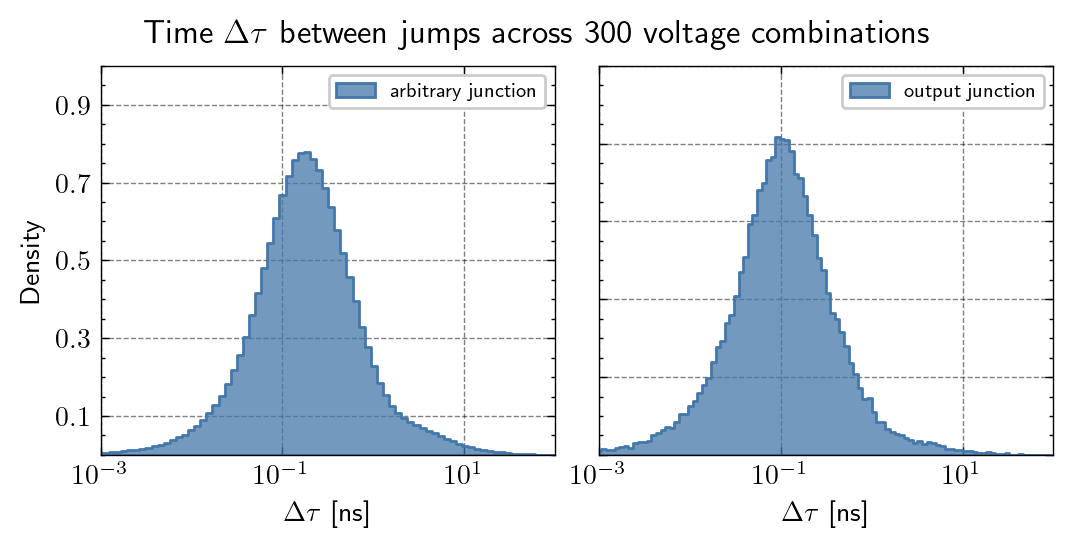

In [24]:
with plt.style.context(['science','bright','grid']):
    
    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*1.5)
    fig.suptitle('Time $\\Delta \\tau$ between jumps across 300 voltage combinations')
    ax  = fig.add_subplot(1,2,1)
    ax  = sns.histplot(t_diff_jumps, ax=ax, bins=150, log_scale=True, stat='density', label='arbitrary junction', element='step', fill=True)
    ax.set_xlabel("$\\Delta \\tau$ [ns]")
    ax.set_xlim(1e-3,1e2)
    ax.set_ylim(0,1)
    ax.legend(fontsize='x-small', loc='upper right')
    ax.set_yticks([0.1,0.3,0.5,0.7,0.9])

    ax  = fig.add_subplot(1,2,2)
    ax  = sns.histplot(t_diff_jumps_out, ax=ax, bins=150, log_scale=True, stat='density', label='output junction', element='step', fill=True)
    ax.set_xlabel("$\\Delta \\tau$ [ns]")
    ax.set_xlim(1e-3,1e2)
    ax.set_ylim(0,1)
    ax.set_yticklabels('')
    ax.set_ylabel('')
    ax.legend(fontsize='x-small', loc='upper right')

-----------------------

In [57]:
HALT STOP

SyntaxError: invalid syntax (673054639.py, line 1)

In [42]:
dic_mem     = {}
dic_I_mem   = {}
dic_t_mem   = {}
tau_0_vals  = np.logspace(-11,-7,12)

for tau_0 in tau_0_vals:

    res_info, res_sim_dic   = return_mem_params(tau_0)
    df_mem, I_mem, t_mem    = run_memristor_kmc(voltages, topology_parameter, res_sim_dic, res_info)

    dic_mem[tau_0]      = df_mem
    dic_I_mem[tau_0]    = I_mem
    dic_t_mem[tau_0]    = t_mem

In [48]:
auto_dic    = {}
time_vals   = np.linspace(0,0.07,100)

for key in dic_I_mem.keys():
    x_vals          = dic_t_mem[key].copy()
    x_vals.loc[-1]  = 0
    x_vals.index    = x_vals.index + 1
    x_vals          = x_vals.sort_index()
    x_vals          = x_vals.iloc[:40].cumsum()
    auto_vals       = []
    print(key)
    for col in range(300):
        try:
            y_vals      = autocorrelation(dic_I_mem[key].iloc[:50,col].values,dic_I_mem[key].iloc[:50,col].values,40)
            func        = interp1d(x_vals[col].values*1e9, y_vals)
            auto_val    = func(time_vals)
            auto_vals.append(auto_val)
        except RuntimeWarning:
            pass
    auto_dic[key] = np.mean(auto_vals,axis=0)

1e-11
2.310129700083158e-11
5.336699231206302e-11
1.2328467394420634e-10
2.848035868435805e-10
6.579332246575682e-10
1.519911082952933e-09
3.5111917342151273e-09
8.11130830789689e-09
1.8738174228603867e-08
4.328761281083061e-08
1e-07


In [49]:
t_c = []
for key, arr in auto_dic.items():
    t_c.append(time_vals[np.where(arr > 1/np.exp(1))[0][-1]])

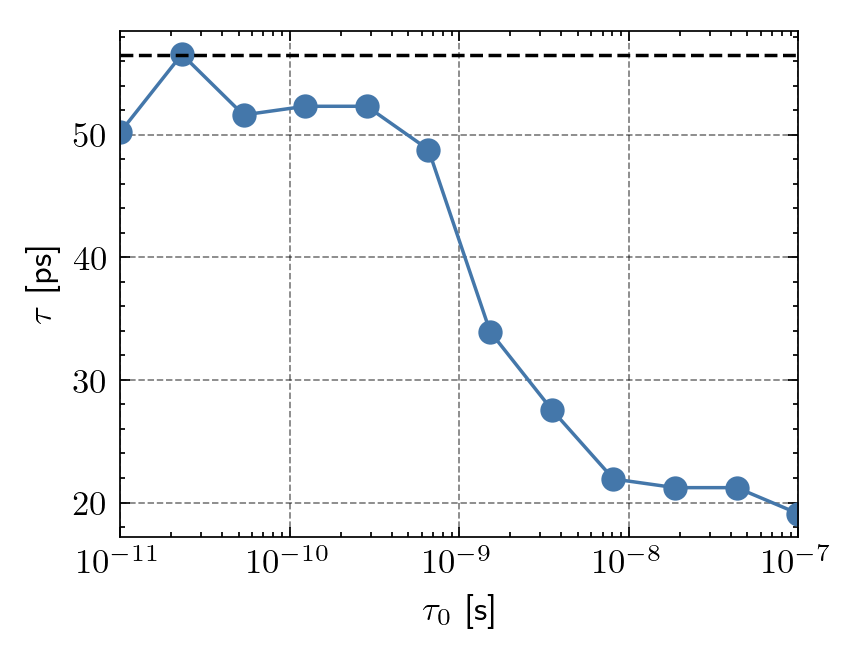

In [55]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=250)
    ax  = fig.add_subplot()
    ax.plot(tau_0_vals, np.array(t_c)*1000, 'o-')
    ax.hlines(56.5,np.min(tau_0_vals),np.max(tau_0_vals), colors='black', zorder=10, linestyles='dashed')
    ax.set_xscale('log')
    ax.set_ylabel('$\\tau$ [ps]')
    ax.set_xlabel('$\\tau_0$ [s]')
    ax.set_xlim(np.min(tau_0_vals),np.max(tau_0_vals))

In [129]:
def sig_figs(x: float, precision: int):
    x = float(x)
    precision = int(precision)
    return round(x, -int(np.floor(np.log10(abs(x)))) + (precision - 1))

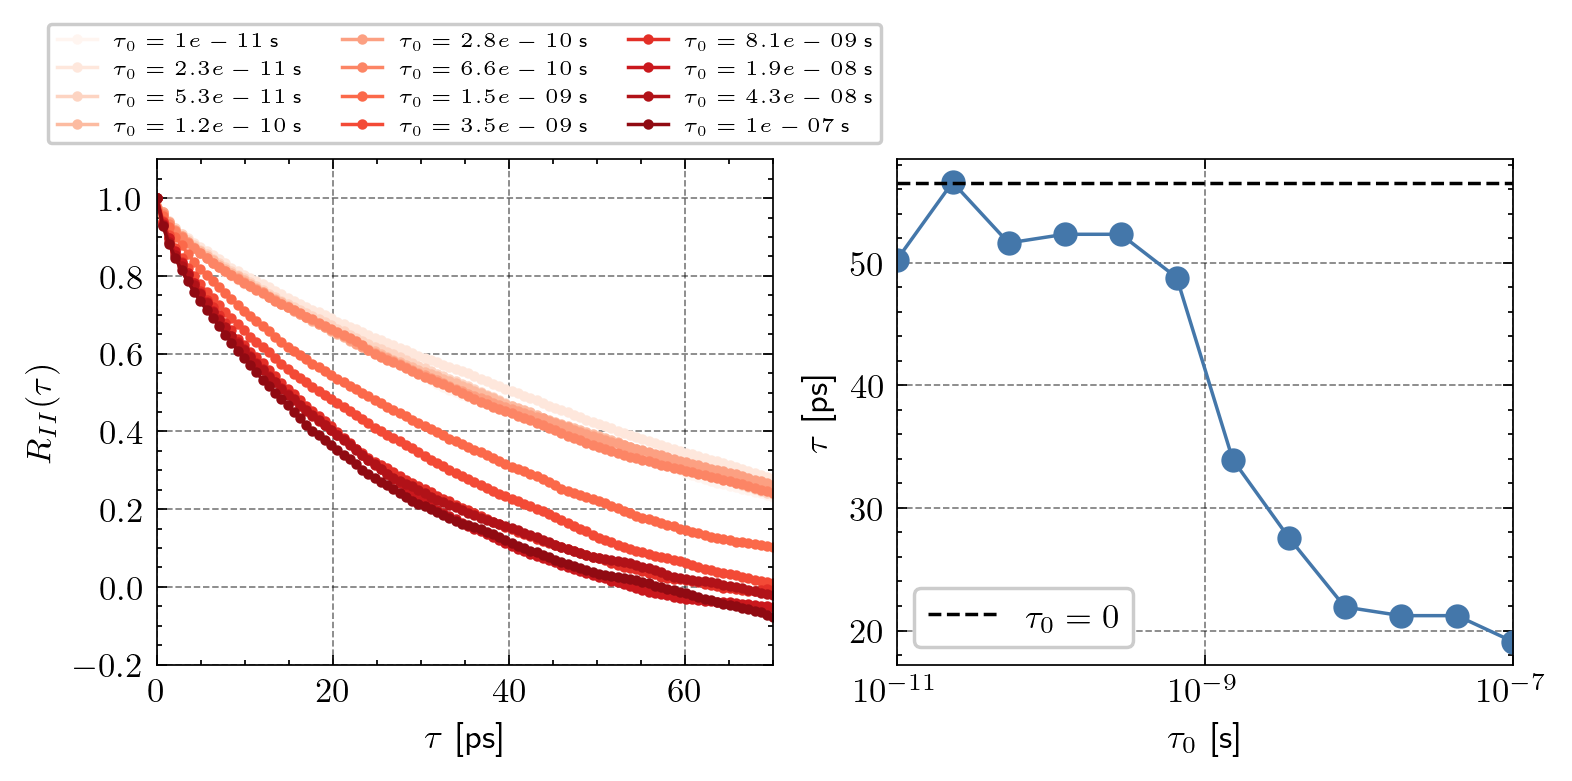

In [153]:
cmap = plt.get_cmap('Reds')
import matplotlib as mpl

with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=250)
    fig.set_figwidth(fig.get_figwidth()*2)
    ax  = fig.add_subplot(1,2,1)

    for i, (key, df) in enumerate(auto_dic.items()):
        ax.plot(time_vals*1000, df, marker='o', ms=2, label=f'$\\tau_0 = {sig_figs(key,2)}$ s', c=cmap(i/len(auto_dic.keys())))

    # ax.hlines(y=1/np.exp(1), xmin=0, xmax=0.6, colors='black', zorder=10, linestyles='dashed')
    # ax.vlines(x=0.0565, ymin=-0.2, ymax=1.1, colors='black',label="$R_{II}(56.5$ ps$) = \\frac{1}{e}$", zorder=10, linestyles='dashed')
    ax.set_xlabel("$\\tau$ [ps]")
    ax.set_ylabel("$R_{II}(\\tau)$")
    ax.set_xlim(0,70)
    ax.set_ylim(-0.2,1.1)
    ax.legend(fontsize='xx-small', ncol=3, bbox_to_anchor=(0.5,1.15), loc='center')

    ax  = fig.add_subplot(1,2,2)
    ax.plot(tau_0_vals, np.array(t_c)*1000, 'o-')
    ax.hlines(56.5,np.min(tau_0_vals),np.max(tau_0_vals), colors='black', zorder=10, linestyles='dashed', label='$\\tau_0 = 0$')
    ax.set_xscale('log')
    ax.set_ylabel('$\\tau$ [ps]')
    ax.set_xlabel('$\\tau_0$ [s]')
    ax.set_xlim(np.min(tau_0_vals),np.max(tau_0_vals))
    ax.legend(loc='lower left')

    fig.savefig("time_scale_memory.png")

In [6]:
def update_bimodal_resistance(I_tilde, slope : float, shift : float, R_max=30, R_min=20):
        ele_charge  = 0.160217662
        R1          = R_max*ele_charge*ele_charge*1e-12
        R2          = R_min*ele_charge*ele_charge*1e-12
        resistances = (R1 - R2)*(-np.tanh(slope*(I_tilde - shift)) + 1)/2 + R2
        return resistances

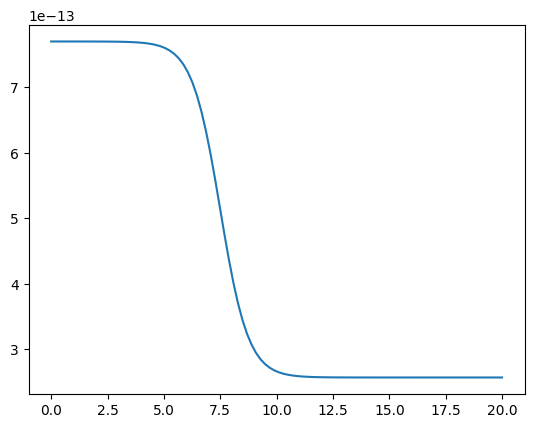

In [8]:
plt.plot(np.linspace(0,20,100), update_bimodal_resistance(np.linspace(0,20,100), 0.8, 7.5, 30, 10))

In [12]:
t_vals = t1_vals[0].values
t_vals

array([6.42260535e-11, 1.72705255e-11, 1.20787371e-12, 7.78338000e-14,
       1.82287189e-11, 1.00725306e-11, 2.03742733e-11, 2.96149363e-13,
       1.54615609e-13, 4.25122930e-11, 8.04743638e-11, 2.32201696e-11,
       5.17846288e-11, 1.58153703e-11, 5.68583901e-11, 1.51603772e-11,
       5.34313859e-11, 9.83130060e-12, 6.19322453e-12, 7.06768384e-12,
       9.08471361e-12, 1.10303463e-11, 3.38372442e-12, 1.02112060e-11,
       3.40772661e-11, 8.57021388e-12, 2.38077809e-11, 6.47073514e-12,
       7.50419880e-12, 3.31694321e-11, 6.33315970e-12, 5.45405679e-13,
       5.71036307e-12, 1.11541712e-11, 1.32665312e-11, 6.88284880e-12,
       2.70130768e-11, 1.07754538e-11, 1.37893806e-11, 2.24672734e-11,
       6.28495674e-12, 5.89008228e-11, 6.47556304e-11, 9.07226550e-13,
       6.68098190e-12, 2.43481593e-11, 1.72742176e-11, 2.88419171e-11,
       2.23975106e-12, 2.56631775e-11, 1.56763686e-12, 6.02528034e-12,
       2.11533601e-12, 8.32314468e-12, 1.84489773e-12, 1.88640032e-11,
      

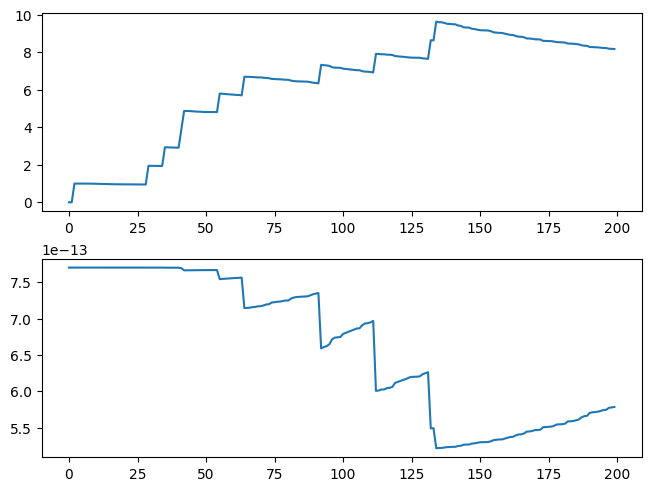

In [74]:
I_tildes    = []
I_tilde     = 0.0
tau_0       = 1e-8
slope       = 0.8
shift       = 7.5

for t in t_vals:

    I_tilde = I_tilde*np.exp(-t/tau_0)
    if np.random.rand() < 0.05:
        I_tilde += 1
    I_tildes.append(I_tilde)

I_tildes    = np.array(I_tildes)
resistances = update_bimodal_resistance(I_tildes, slope=slope, shift=shift)

fig = plt.figure(layout='constrained')
ax  = fig.add_subplot(2,1,1)
ax.plot(I_tildes)

ax  = fig.add_subplot(2,1,2)
ax.plot(resistances)

In [ ]:
plt.plot(autocorrelation(I1.iloc[:50,0].values,I1.iloc[:50,0].values,49))

In [ ]:
df_I1 = I1.iloc[:50,:]
df_I2 = I2.iloc[:50,:]

In [ ]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax.plot(np.arange(50), df_I1.mean(axis=1), 's-', ms=2)
    ax.fill_between(np.arange(50), df_I1.mean(axis=1)-df_I1.std(axis=1)/np.sqrt(300),
                    df_I1.mean(axis=1)+df_I1.std(axis=1)/np.sqrt(300), alpha=0.5)

    ax.plot(np.arange(50), df_I2.mean(axis=1), 'o-', ms=2)
    ax.fill_between(np.arange(50), df_I2.mean(axis=1)-df_I2.std(axis=1)/np.sqrt(300),
                    df_I2.mean(axis=1)+df_I2.std(axis=1)/np.sqrt(300), alpha=0.5)

In [ ]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=300, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*1.2)
    fig.set_figheight(fig.get_figheight()*1.2)

    fig.suptitle(f'Max Steps allowed : {max_jumps}, Steps per batch : {jumps_per_batch}', fontsize='small')

    ax  = fig.add_subplot(2,1,1)
    ax.errorbar(x=df1[11], y=df2[11], xerr=df1[12], yerr=df2[12], marker='.', capsize=2, ls='', ms=1, elinewidth=1, capthick=1)
    ax.set_xlabel("$I$ by $\Gamma$")
    ax.set_ylabel("$I$ by counting")
    ax.set_xlim(-1500,1500)
    ax.set_ylim(-1500,1500)

    ax  = fig.add_subplot(2,1,2)
    ax  = sns.kdeplot(df1[10], label="$I$ by $\Gamma$")
    ax  = sns.kdeplot(df2[10], label="$I$ by counting")
    ax.set_xlim(0,100000)
    ax.set_xlabel('KMC Steps')
    ax.set_ylabel('')
    ax.legend()

    fig.savefig(f"count_vs_gamma_{jumps_per_batch}.png")

In [ ]:
voltages        = np.zeros(shape=(300,3))
voltages[:,0]   = np.linspace(0,0.1,300)

topology_parameter = {
    "Nx"    : 7,
    "Ny"    : 7,
    "Nz"    : 1,
    "e_pos" : [[0,0,0],[6,6,0]]
}

In [ ]:
jumps_per_batch = 1000
max_jumps       = 100000

sim_dic1 ={
    'error_th'        : 0.05,
    'max_jumps'       : max_jumps,
    'eq_steps'        : 1000,
    'jumps_per_batch' : jumps_per_batch,
    'kmc_counting'    : False
}

sim_dic2 ={
    'error_th'        : 0.05,
    'max_jumps'       : max_jumps,
    'eq_steps'        : 1000,
    'jumps_per_batch' : jumps_per_batch,
    'kmc_counting'    : True
}

In [ ]:
t1 = time.process_time()
df1, I1 = run_kmc(voltages, topology_parameter, sim_dic1)
t2 = time.process_time()
print(t2-t1)

df2, I2 = run_kmc(voltages, topology_parameter, sim_dic2)
t3 = time.process_time()
print(t3-t2)

In [ ]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    ax.errorbar(df1[0]*1000, df1[5], np.abs(df1[6]), marker='o', label=f'Gamma-KMC',
                ms=2, capsize=2, markevery=10, errorevery=10, lw=0.5)
    ax.errorbar(df2[0]*1000, df2[5], np.abs(df2[6]), marker='s', label=f'Counting-KMC',
                ms=2, capsize=2, markevery=(5,10), errorevery=(5,10), lw=0.5)

    ax.set_xlabel('$U$ [mV]')
    ax.set_ylabel('$I$ [pA]')
    ax.legend(fontsize='small')

In [ ]:
dic             = {}
net_parameter   = [[2,1],[2,2],[3,2],[3,3]]
jumps_per_stat  = 50000

for i,net_params in enumerate(net_parameter):

    # Network Parameter
    topology_parameter = {
        "Nx"    : net_params[0],
        "Ny"    : net_params[1],
        "Nz"    : 1,
        "e_pos" : [[0,0,0],[net_params[0]-1,net_params[1]-1,0]]
    }

    sim_dic ={
        'error_th'        : 0.05,
        'max_jumps'       : 1000000,
        'eq_steps'        : 10000,
        'jumps_per_stat'  : jumps_per_stat}

    voltages        = np.zeros(shape=(600,3))
    voltages[:,0]   = np.linspace(0,0.1,600)

    np_network_cubic = nanonets.simulation(network_topology='cubic', topology_parameter=topology_parameter)
    np_network_cubic.run_const_voltages(voltages=voltages, target_electrode=1, save_th=0.1, output_potential=False, sim_dic=sim_dic)

    df1      = pd.DataFrame(np.hstack((voltages,np_network_cubic.return_output_values())))
    df1[7]   = np_network_cubic.return_potential_landscape()[:,topology_parameter['Nx']*topology_parameter['Ny']+1]
    df1      = df1.sort_values(by=0)
    dic[i]   = df1

In [ ]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for key, df in dic.items():

        ax.plot(df[7]*1000, df[5], '.', label=f'$N_x = {net_parameter[key][0]}$, $N_y = {net_parameter[key][1]}$', ms=2)

    ax.set_xlabel('NP Potential')
    ax.set_ylabel('Current')
    ax.set_ylim(0,5000)
    ax.set_xlim(0,30)
    ax.legend(fontsize='small')

    fig.savefig(f'I_phi_{jumps_per_stat}.png')

In [ ]:
ele_charge  = 0.160217662
c_inv       = np_network_cubic.inv_capacitance_matrix

def free_energy1(pot):
    return -ele_charge*pot + (ele_charge*ele_charge/2)*c_inv[3,3]

def free_energy2(pot):
    return ele_charge*pot + (ele_charge*ele_charge/2)*c_inv[3,3]

def tunnel_rate(df):

    R           = 25e-12
    gamma       = np.zeros(len(df))
    gamma[df<0] = -df[df<0]/(ele_charge*ele_charge*R)

    return gamma

In [ ]:
# def pot_current_dep(voltages, n_jumps=10000, eq_steps=10000):

#     pot_landscape   = np.zeros(n_jumps)
#     time_vals       = np.zeros(n_jumps)
#     pos_jumps       = np.zeros(n_jumps)
#     neg_jumps       = np.zeros(n_jumps)
#     rate_diffs      = np.zeros(n_jumps)

#     np_network_cubic    = nanonets.simulation(network_topology='cubic', topology_parameter=topology_parameter)

#     # Based on current voltages get charges and potentials
#     np_network_cubic.init_charge_vector(voltages)
#     np_network_cubic.init_potential_vector(voltages)
#     np_network_cubic.init_const_capacitance_values()
#     np_network_cubic.np_target_electrode_electrostatic_properties(1)

#     # Return Model Arguments
#     inv_capacitance_matrix                                                                  = np_network_cubic.return_inv_capacitance_matrix()
#     charge_vector                                                                           = np_network_cubic.return_charge_vector()
#     potential_vector                                                                        = np_network_cubic.return_potential_vector()
#     const_capacitance_values, const_capacitance_values_co1, const_capacitance_values_co2    = np_network_cubic.return_const_capacitance_values()
#     N_electrodes, N_particles                                                               = np_network_cubic.return_particle_electrode_count()
#     adv_index_rows, adv_index_cols, co_adv_index1, co_adv_index2, co_adv_index3             = np_network_cubic.return_advanced_indices()
#     temperatures, temperatures_co                                                           = np_network_cubic.return_const_temperatures(T=0.0)
#     resistances, resistances_co1, resistances_co2                                           = np_network_cubic.return_random_resistances(R=np_network_cubic.res_info['mean_R'], Rstd=np_network_cubic.res_info['std_R'])
#     idx_np_target, C_np_self, C_np_target                                                   = np_network_cubic.return_output_electrostatics()

#     # Pass all model arguments into Numba optimized Class
#     model = nanonets.model_class(charge_vector, potential_vector, inv_capacitance_matrix, const_capacitance_values, const_capacitance_values_co1, const_capacitance_values_co2,
#                             temperatures, temperatures_co, resistances, resistances_co1, resistances_co2, adv_index_rows, adv_index_cols, co_adv_index1, co_adv_index2,
#                             co_adv_index3, N_electrodes, N_particles, C_np_target, C_np_self)
    
#     model.calc_potentials()

#     for i in range(eq_steps):
        
#         random_number1  = np.random.rand()
#         random_number2  = np.random.rand()
#         model.calc_tunnel_rates_zero_T()
#         model.select_event(random_number1, random_number2)

#     model.time = 0.0

#     rate_index1 = np.where(np_network_cubic.adv_index_cols == 1)[0][0]
#     rate_index2 = np.where(np_network_cubic.adv_index_rows == 1)[0][0]

#     for i in range(n_jumps):

#         t1 = model.time
        
#         pot_landscape[i]= model.potential_vector[5]
        
#         random_number1  = np.random.rand()
#         random_number2  = np.random.rand()
#         model.calc_tunnel_rates_zero_T()
#         rate_diffs[i] = model.tunnel_rates[rate_index1] - model.tunnel_rates[rate_index2]
#         model.select_event(random_number1, random_number2)

#         np1 = model.adv_index_rows[model.jump]
#         np2 = model.adv_index_cols[model.jump]

#         # If jump from target electrode
#         if (np1 == 1):
#             neg_jumps[i] = 1
            
#         # If jump towards target electrode
#         if (np2 == 1):
#             pos_jumps[i] = 1
        
#         t2 = model.time

#         time_vals[i] = t2-t1
    
#     return pd.DataFrame((np.array(pot_landscape),np.sum(np.array(time_vals)),pos_jumps-neg_jumps, np.array(rate_diffs))).T

In [ ]:
def pot_current_dep(voltages, topology_parameter, n_jumps=10000, eq_steps=10000):

    pot_landscape   = np.zeros(n_jumps)
    time_vals       = np.zeros(n_jumps)
    pos_jumps       = np.zeros(n_jumps)
    neg_jumps       = np.zeros(n_jumps)
    rate_diffs      = np.zeros(n_jumps)

    np_network_cubic    = nanonets.simulation(network_topology='cubic', topology_parameter=topology_parameter)

    # Based on current voltages get charges and potentials
    np_network_cubic.init_charge_vector(voltages)
    np_network_cubic.init_potential_vector(voltages)
    np_network_cubic.init_const_capacitance_values()
    np_network_cubic.np_target_electrode_electrostatic_properties(1)

    # Return Model Arguments
    inv_capacitance_matrix                                                                  = np_network_cubic.return_inv_capacitance_matrix()
    charge_vector                                                                           = np_network_cubic.return_charge_vector()
    potential_vector                                                                        = np_network_cubic.return_potential_vector()
    const_capacitance_values, const_capacitance_values_co1, const_capacitance_values_co2    = np_network_cubic.return_const_capacitance_values()
    N_electrodes, N_particles                                                               = np_network_cubic.return_particle_electrode_count()
    adv_index_rows, adv_index_cols, co_adv_index1, co_adv_index2, co_adv_index3             = np_network_cubic.return_advanced_indices()
    temperatures, temperatures_co                                                           = np_network_cubic.return_const_temperatures(T=0.0)
    resistances, resistances_co1, resistances_co2                                           = np_network_cubic.return_random_resistances(R=np_network_cubic.res_info['mean_R'], Rstd=np_network_cubic.res_info['std_R'])
    idx_np_target, C_np_self, C_np_target                                                   = np_network_cubic.return_output_electrostatics()

    # Pass all model arguments into Numba optimized Class
    model = nanonets.model_class(charge_vector, potential_vector, inv_capacitance_matrix, const_capacitance_values, const_capacitance_values_co1, const_capacitance_values_co2,
                            temperatures, temperatures_co, resistances, resistances_co1, resistances_co2, adv_index_rows, adv_index_cols, co_adv_index1, co_adv_index2,
                            co_adv_index3, N_electrodes, N_particles, C_np_target, C_np_self)
    
    model.calc_potentials()

    for i in range(eq_steps):
        
        random_number1  = np.random.rand()
        random_number2  = np.random.rand()
        model.calc_tunnel_rates_zero_T()
        model.select_event(random_number1, random_number2)

    model.time = 0.0

    rate_index1 = np.where(np_network_cubic.adv_index_cols == 1)[0][0]
    rate_index2 = np.where(np_network_cubic.adv_index_rows == 1)[0][0]

    for i in range(n_jumps):

        t1 = model.time
        
        pot_landscape[i]= model.potential_vector[topology_parameter['Nx']*topology_parameter['Ny']+1]
        
        random_number1  = np.random.rand()
        random_number2  = np.random.rand()
        model.calc_tunnel_rates_zero_T()
        rate_diffs[i] = model.tunnel_rates[rate_index1] - model.tunnel_rates[rate_index2]
        model.select_event(random_number1, random_number2)

        np1 = model.adv_index_rows[model.jump]
        np2 = model.adv_index_cols[model.jump]

        # If jump from target electrode
        if (np1 == 1):
            neg_jumps[i] = 1
            
        # If jump towards target electrode
        if (np2 == 1):
            pos_jumps[i] = 1
        
        t2 = model.time

        time_vals[i] = t2-t1
    
    return [np.mean(np.array(pot_landscape)),np.sum(np.array(time_vals)),np.sum(pos_jumps-neg_jumps), np.sum(np.array(rate_diffs)*time_vals)*(10**(-6))/np.sum(time_vals)]

In [ ]:
dic1            = {}
dic2            = {}
net_parameter   = [[2,1],[2,2],[3,2],[3,3]]
jumps_per_stat  = 1000

for i,net_params in enumerate(net_parameter):

    # Network Parameter
    topology_parameter = {
        "Nx"    : net_params[0],
        "Ny"    : net_params[1],
        "Nz"    : 1,
        "e_pos" : [[0,0,0],[net_params[0]-1,net_params[1]-1,0]]
    }

    sim_dic ={
        'error_th'        : 0.05,
        'max_jumps'       : 1000000,
        'eq_steps'        : 10000,
        'jumps_per_stat'  : jumps_per_stat}

    voltages        = np.zeros(shape=(600,3))
    voltages[:,0]   = np.linspace(0,0.1,600)

    np_network_cubic = nanonets.simulation(network_topology='cubic', topology_parameter=topology_parameter)
    np_network_cubic.run_const_voltages(voltages=voltages, target_electrode=1, save_th=0.1, output_potential=False, sim_dic=sim_dic)

    df1      = pd.DataFrame(np.hstack((voltages,np_network_cubic.return_output_values())))
    df1[7]   = np_network_cubic.return_potential_landscape()[:,topology_parameter['Nx']*topology_parameter['Ny']+1]
    df1      = df1.sort_values(by=0)
    dic1[i]  = df1

    ##########################################################

    vals = []

    for V in voltages[:,0]:

        v_array = np.array([V,0.0,0.0])
        vals.append(pot_current_dep(v_array, topology_parameter, jumps_per_stat))

    df1 = pd.DataFrame(vals)
    dic2[i] = df1

In [ ]:
dic1[i]*ele_charge

In [ ]:
with plt.style.context(["science","bright","grid"]):
    
    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*1.5)

    for i in dic.keys():

        ax  = fig.add_subplot(2,2,i+1)
        ax.plot(np.linspace(0,0.1,600)*1000, dic2[i][3].values*ele_charge, 'o', label='$I = e \cdot (\Gamma_+ - \Gamma_-)$', ms=1)
        ax.plot(np.linspace(0,0.1,600)*1000, dic1[i][5]*ele_charge, 'o', label='$I$ based on counting', ms=1)
        
        if i == 0:
            ax.legend(loc='center', bbox_to_anchor=(1,1.2), ncol=2)
        if i == 0 or i == 2:
            ax.set_ylabel('I [pA]')
        if i == 2 or i == 3:
            ax.set_xlabel('U [mV]')
        
        ax.set_ylim(0,800)
        ax.set_xlim(0,100)

    fig.savefig("I_comparsion.png")

In [ ]:
n_jumps     = 10000
vals        = []

for V in np.linspace(-0.1,0.1,600):

    voltages    = np.array([V,0.0,0.0])
    vals.append(pot_current_dep(voltages, topology_parameter, jumps_per_stat))
    
df = pd.DataFrame(vals)
df

In [ ]:
plt.plot(np.cumsum(df[1]), df[3]*10**(-6))

In [ ]:
free_e = free_energy(df[0])

with plt.style.context(["science","bright"]):
    
    plt.figure(dpi=200)
    plt.plot(df[0], '.-')
    plt.plot(free_e)
    plt.vlines(np.arange(len(df[1]))[df[2].values == 1], ymin=0, ymax=0.15, color='black', lw=0.5)
    plt.xlim(0,100)
    plt.ylim(0, 0.1)
    plt.ylabel('Potential')
    plt.xlabel('Jumps')

In [ ]:
gamma = tunnel_rate(free_e)

with plt.style.context(["science","bright"]):
    plt.figure(dpi=200)
    plt.plot(gamma)
    plt.vlines(np.arange(len(df[1]))[df[2].values == 1], ymin=0, ymax=0.15, color='black', lw=0.5)
    plt.xlim(0,100)
    plt.ylabel('Gamma')
    plt.xlabel('Jumps')

In [ ]:
with plt.style.context(["science","bright"]):
    plt.figure(dpi=200)
    plt.plot(np.cumsum(df[1]),df[0], '.-')
    plt.vlines(np.cumsum(df[1]).values[df[2].values == 1], ymin=0, ymax=0.15, color='black', lw=0.5)
    plt.ylim(0, 0.1)
    plt.xlim(0,2e-9)
    plt.ylabel('Potential')
    plt.xlabel('Time')

In [ ]:
I = tunnel_rate(free_energy1(df[0])) - tunnel_rate(free_energy2(df[0]))
plt.plot(I)
plt.xlim(0,100)

In [ ]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200,layout='constrained')
    ax  = fig.add_subplot()
    ax.plot(np.cumsum(df[1]), np.cumsum(df[2]), '.-')
    ax.set_xlim(0,1e-9)
    ax.set_ylim(0,10)

    ax2 = ax.twinx()
    ax2.plot(np.cumsum(df[1]), df[0], '.-', c='red')
    ax2.set_xlim(0,1e-9)

In [ ]:
vals_per_bin    = 2
df[3]           = np.repeat(np.arange(1,n_jumps/vals_per_bin+1),vals_per_bin)
df_bins         = df[[0,3]].groupby(by=3).mean()
df_bins[1]      = df[[2,3]].groupby(by=3).sum()[2]/df[[1,3]].groupby(by=3).sum()[1]

with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200,layout='constrained')
    ax  = fig.add_subplot(3,1,1)
    ax.plot(df_bins[0], df_bins[1], '.')

    ax  = fig.add_subplot(3,1,2)
    ax.plot(df_bins[0], '.')

    ax  = fig.add_subplot(3,1,3)
    ax.plot(df_bins[1], '.')